# Parkinson's Disease Dataset
Attribute Information:
----------------------
Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,

MDVP:Shimmer(dB),

Shimmer:APQ3,

Shimmer:APQ5,

MDVP:APQ,

Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 


# 1. Importing Libraries for ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")


# 2. Importing Data

In [2]:
df = pd.read_csv('parkinsons.csv')
df.head(3)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


# 3.  Data Cleaning
1. Finding the null values and handling them in proper way.
2. Drop uneccessay data columns.
3. Find outliers and remove them.

In [3]:
df.iloc[:3,:10]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233


In [4]:
df.iloc[:3,:14]

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590


In [5]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
df.shape

(195, 24)

## 3.1 Finding the null values

In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

## 3.2 Drop the "name" column which is unnecessary in predictive modelling.

In [8]:
df.drop(["name"], axis=1, inplace=True)

## 3.3 Finding outliers and removing them.

#### Create functions to
- plot the outliers using boxplots and distplots
- find outliers in skewed and normally distributed data.
- remove outliers in skewed and normally distributed data.

In [9]:
# function to plot the distplot and boxplot for given dataframe and column
def plot_distribution(df, col):
    fig, ax =plt.subplots(1,2)
    plt.figure(figsize=(40,10))
    sns.distplot(df[col], ax=ax[0])  
    df.boxplot(column=col, ax=ax[1])
    plt.show()

# function to find outliers in normally distributed data
def find_outliers_normal(data, col):
    upper_bound = data[col].mean() + 3*data[col].std()
    lower_bound = data[col].mean() - 3*data[col].std()

    upper_outliers = len(data.loc[data[col]>upper_bound])
    lower_outliers = len(data.loc[data[col]>upper_bound])
    
    print("Outliers in '",col,"' Column")
    print("Upper Bound - ",upper_bound)
    print("Lower Bound - ",lower_bound)
    print("Number of Upper Outliers - ",upper_outliers)
    print("Number of Lower Outliers - ",lower_outliers)
    print("")

# function to find outliers in skewed data
def find_outliers_skewed(df, col):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    
    upper_bound = df[col].quantile(0.75) + (IQR*1.5)
    lower_bound = df[col].quantile(0.25) - (IQR*1.5)
    
    upper_outliers = len(df.loc[df[col]>upper_bound])
    lower_outliers = len(df.loc[df[col]<lower_bound])
    
    
    print("Outliers in '",col,"' Column")
    print("Upper Bound - ",upper_bound)
    print("Lower Bound - ",lower_bound)
    print("Number of Upper Outliers - ",upper_outliers)
    print("Number of Lower Outliers - ",lower_outliers)
    print("")


    
# function to remove outliers from normally distributed data.
def remove_outliers_normal(df, col):
    df = df.copy(deep=True)
    upper_bound = df[col].mean() + 3*df[col].std()
    lower_bound = df[col].mean() - 3*df[col].std()
    
    df.loc[df[col]>=upper_bound, col] = upper_bound
    df.loc[df[col]<=lower_bound, col] = lower_bound
    
    return df


# function to remove outliers from skewed data.
def remove_outliers_skewed(df, col):
    IQR = df[col].quantile(0.75)-df[col].quantile(0.25)
    
    upper_bridge = df[col].quantile(0.75) + (IQR*1.5)
    lower_bridge = df[col].quantile(0.25) - (IQR*1.5)
    
    df.loc[df[col]>=upper_bridge, col] = upper_bridge
    df.loc[df[col]<=lower_bridge, col] = lower_bridge
    
    return df

In [10]:
features_list = list(df.columns)
features_list.remove("status")
print(features_list)

['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


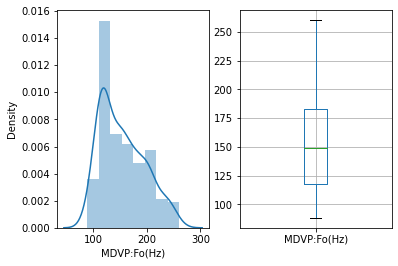

<Figure size 2880x720 with 0 Axes>

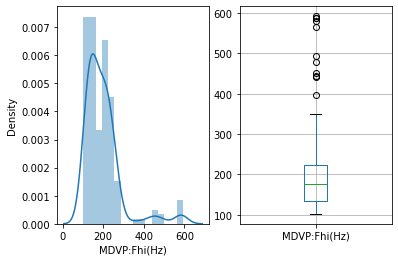

<Figure size 2880x720 with 0 Axes>

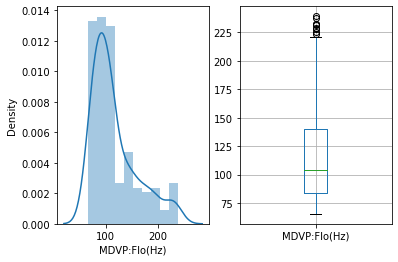

<Figure size 2880x720 with 0 Axes>

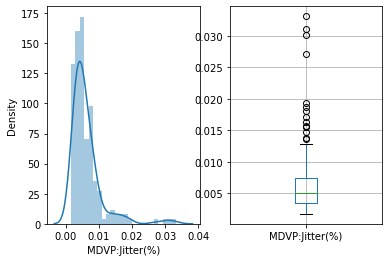

<Figure size 2880x720 with 0 Axes>

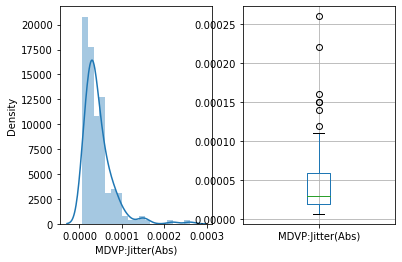

<Figure size 2880x720 with 0 Axes>

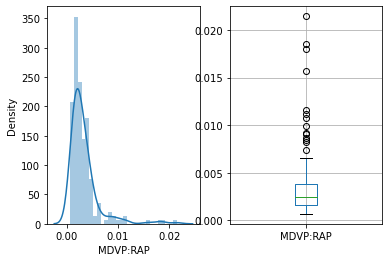

<Figure size 2880x720 with 0 Axes>

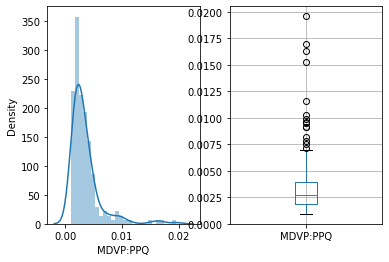

<Figure size 2880x720 with 0 Axes>

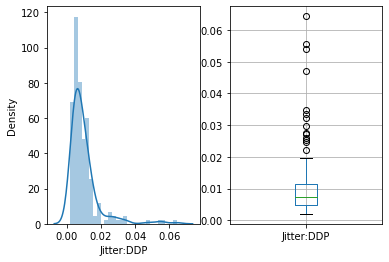

<Figure size 2880x720 with 0 Axes>

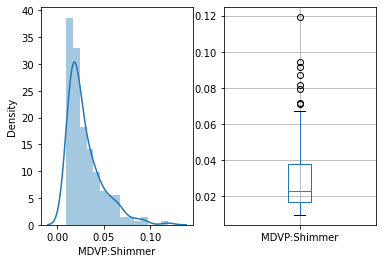

<Figure size 2880x720 with 0 Axes>

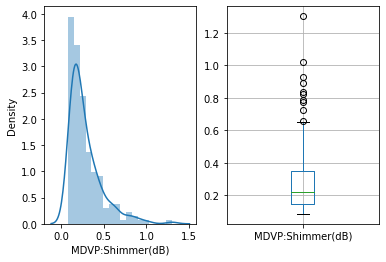

<Figure size 2880x720 with 0 Axes>

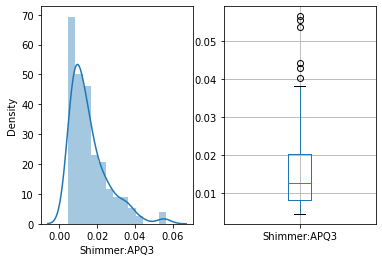

<Figure size 2880x720 with 0 Axes>

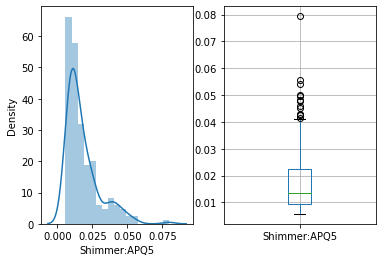

<Figure size 2880x720 with 0 Axes>

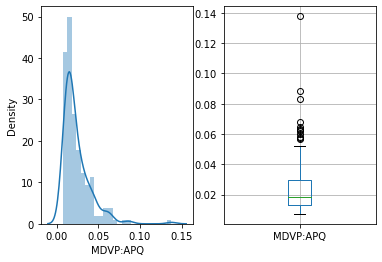

<Figure size 2880x720 with 0 Axes>

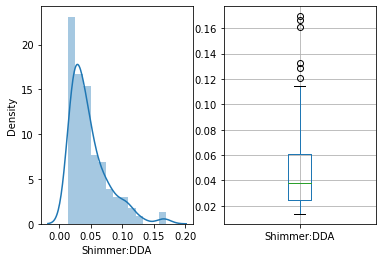

<Figure size 2880x720 with 0 Axes>

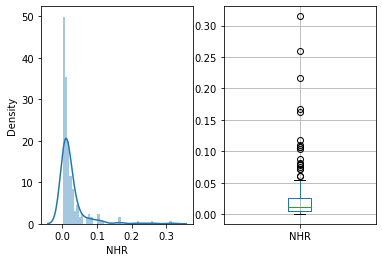

<Figure size 2880x720 with 0 Axes>

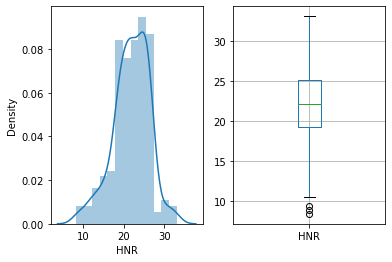

<Figure size 2880x720 with 0 Axes>

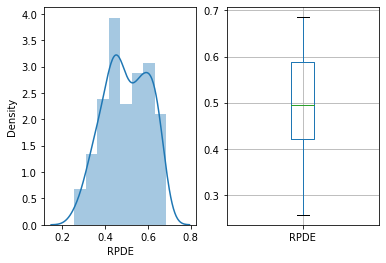

<Figure size 2880x720 with 0 Axes>

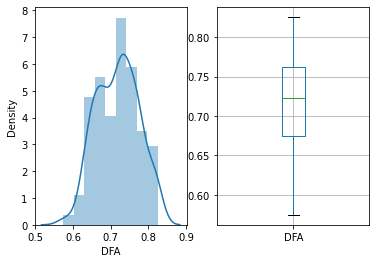

<Figure size 2880x720 with 0 Axes>

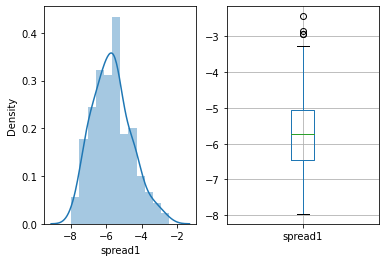

<Figure size 2880x720 with 0 Axes>

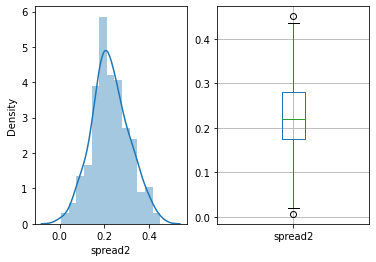

<Figure size 2880x720 with 0 Axes>

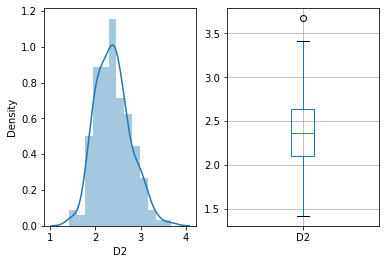

<Figure size 2880x720 with 0 Axes>

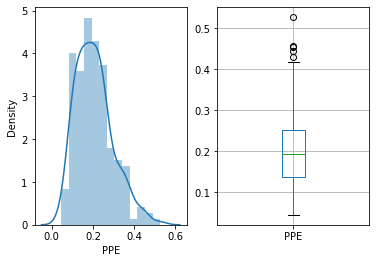

<Figure size 2880x720 with 0 Axes>

In [11]:
# plot distplot and boxplots for each column except "status column"
for i in features_list:
    plot_distribution(df, i)

In [12]:
# find out the outliers in data
for i in features_list:
    find_outliers_skewed(df, i)

Outliers in ' MDVP:Fo(Hz) ' Column
Upper Bound -  280.5645
Lower Bound -  19.7765
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' MDVP:Fhi(Hz) ' Column
Upper Bound -  358.22
Lower Bound -  0.8480000000000132
Number of Upper Outliers -  11
Number of Lower Outliers -  0

Outliers in ' MDVP:Flo(Hz) ' Column
Upper Bound -  223.60975000000005
Lower Bound -  0.6997499999999661
Number of Upper Outliers -  9
Number of Lower Outliers -  0

Outliers in ' MDVP:Jitter(%) ' Column
Upper Bound -  0.0132225
Lower Bound -  -0.0023975
Number of Upper Outliers -  14
Number of Lower Outliers -  0

Outliers in ' MDVP:Jitter(Abs) ' Column
Upper Bound -  0.00011999999999999999
Lower Bound -  -3.9999999999999996e-05
Number of Upper Outliers -  7
Number of Lower Outliers -  0

Outliers in ' MDVP:RAP ' Column
Upper Bound -  0.0070975
Lower Bound -  -0.0016024999999999998
Number of Upper Outliers -  14
Number of Lower Outliers -  0

Outliers in ' MDVP:PPQ ' Column
Upper Bound -  0.007

In [13]:
# remove the outliers from each column
for i in features_list:
    remove_outliers_skewed(df, i)

In [14]:
# See if their are outliers still exists in data
for i in features_list:
    find_outliers_skewed(df, i)

Outliers in ' MDVP:Fo(Hz) ' Column
Upper Bound -  280.5645
Lower Bound -  19.7765
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' MDVP:Fhi(Hz) ' Column
Upper Bound -  358.22
Lower Bound -  0.8480000000000132
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' MDVP:Flo(Hz) ' Column
Upper Bound -  223.60975000000005
Lower Bound -  0.6997499999999661
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' MDVP:Jitter(%) ' Column
Upper Bound -  0.0132225
Lower Bound -  -0.0023975
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' MDVP:Jitter(Abs) ' Column
Upper Bound -  0.00011999999999999999
Lower Bound -  -3.9999999999999996e-05
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' MDVP:RAP ' Column
Upper Bound -  0.0070975
Lower Bound -  -0.0016024999999999998
Number of Upper Outliers -  0
Number of Lower Outliers -  0

Outliers in ' MDVP:PPQ ' Column
Upper Bound -  0.007097

# 4. Feature Engineering
## 1. Selecting the features by using Heatmap of correlation, removing highly correlated features. 
   - Heatmap for plotting correlation matrix.
   - Create function to remove highly correlated features


<AxesSubplot:>

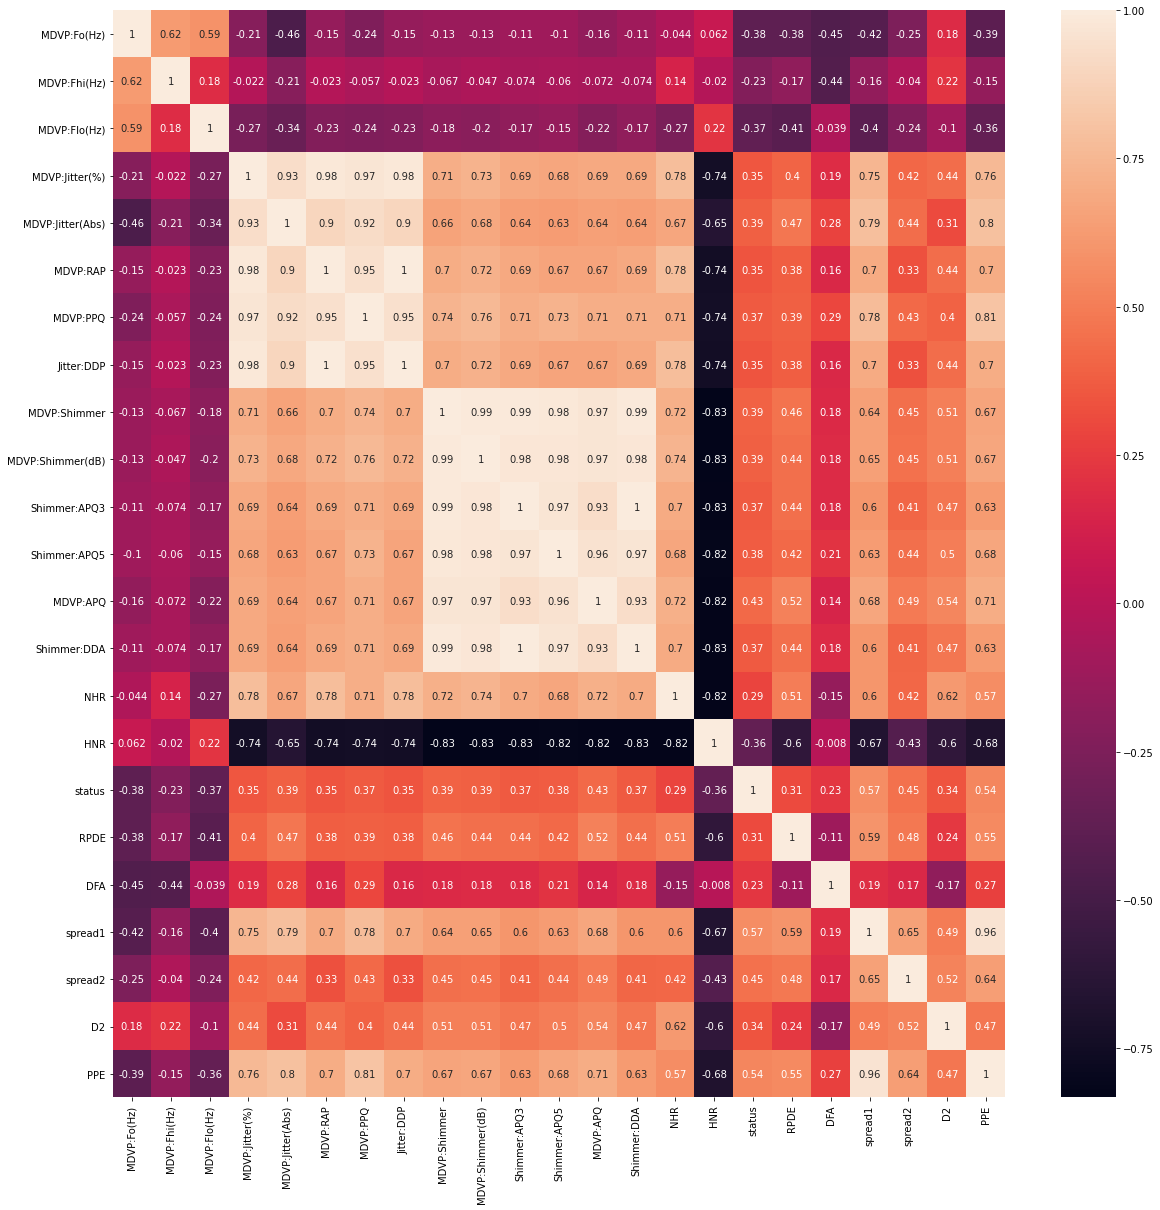

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [16]:
# function to find highly correlated features

def highly_correlated_columns(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [17]:
# highly correlated features
corr_features = highly_correlated_columns(df, 0.85)
corr_features

{'Jitter:DDP',
 'MDVP:APQ',
 'MDVP:Jitter(Abs)',
 'MDVP:PPQ',
 'MDVP:RAP',
 'MDVP:Shimmer(dB)',
 'PPE',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'Shimmer:DDA'}

In [18]:
# remove correlated features.
df.drop(corr_features, axis=1, inplace=True)

<AxesSubplot:>

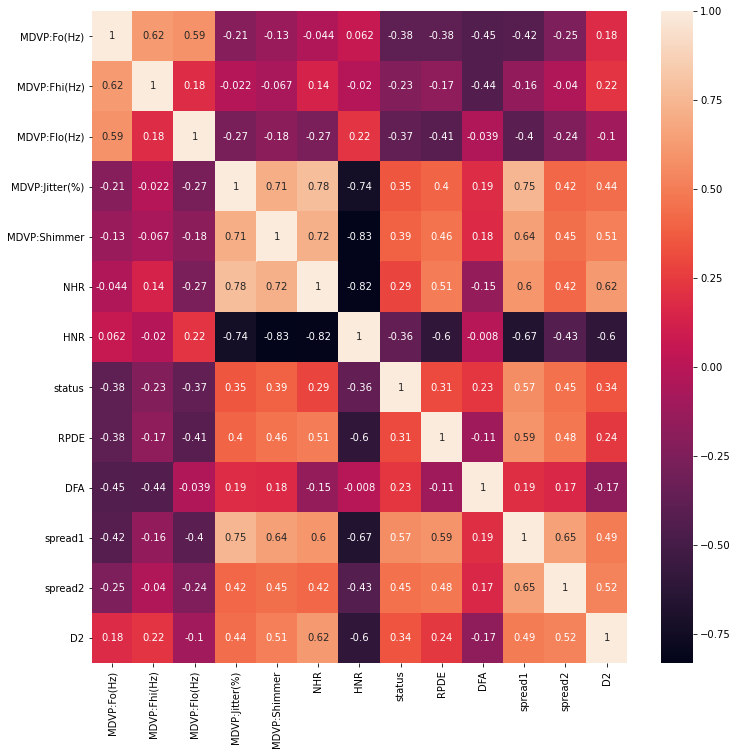

In [19]:
# See if their are other features which are highly correlated. 
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

## 4.2 Handling Imbalance data

As we can see their is large imbalance in data, their are 48 records for negative class and 147 for positive class.

<AxesSubplot:xlabel='status', ylabel='count'>

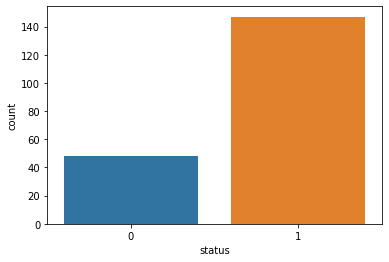

In [20]:
# split data into target and features
x = df.drop(["status"], axis=1)
y = df["status"]

# countplot() to see imbalance in data
sns.countplot(y)

In [21]:
# see how much records are their for each class
y.value_counts()

1    147
0     48
Name: status, dtype: int64

###  Oversampling for imbalance dataset

In [22]:
over_sampler = RandomOverSampler()

x, y = over_sampler.fit_resample(x, y)

<AxesSubplot:xlabel='status', ylabel='count'>

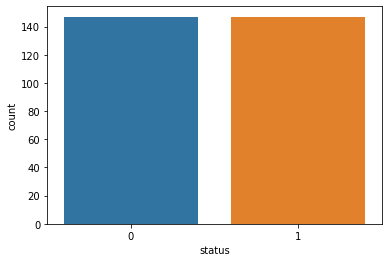

In [23]:
sns.countplot(y)

In [24]:
y.value_counts()

0    147
1    147
Name: status, dtype: int64

## 4.3 Splitting Data into Features and Target

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.5)

# 5. Predictive Modelling
###  Finding the best `n_estimators` value for RandomForest Classifier

Find the score for randomFOrest Classifier for each n_estimator value and see which n_estimator gives maximum value.

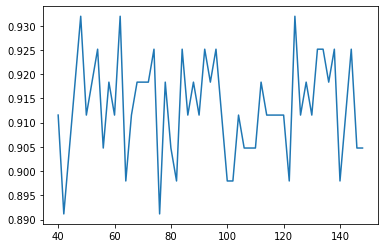

In [26]:
scores = []

for i in range(40,150,2):
    model = RandomForestClassifier(n_estimators=i, bootstrap=True,)
    
    model.fit(x_train,y_train)
    
    scores.append(model.score(x_test,y_test))

plt.plot(range(40,150,2), scores)

In [27]:
# find the n_estimator value for which score is highest
high_score_index = scores.index(max(scores))
estimators = np.arange(40,150,2)
n_est = estimators[high_score_index]

### Define RandomForest Classifier

In [28]:
rf = RandomForestClassifier(n_estimators=n_est)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=48)

In [29]:
y_pred = rf.predict(x_test)

### Evaluation of RandomForest Classifier

In [30]:
# Classification report for random forest classifier
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.94      0.90        68
           1       0.94      0.86      0.90        79

    accuracy                           0.90       147
   macro avg       0.90      0.90      0.90       147
weighted avg       0.90      0.90      0.90       147



In [31]:
# Confusion matrix 
confusion_matrix(y_test, y_pred)

array([[64,  4],
       [11, 68]], dtype=int64)

In [32]:
# Score for model
rf.score(x_test, y_test)

0.8979591836734694

# 6. Hyperparameter Tuning 

In [33]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,50,10)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]

# parameter dictionary for RandomizedSearchCV 
params = { 'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'criterion':['entropy','gini']}


rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=params, n_iter=100, cv=5, verbose=2)

rf_randomcv.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=gini, max_depth=45, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=45, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=45, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=45, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=45, max_features=log2, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=14; 

[CV] END criterion=entropy, max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=45, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=45, max_features=sqrt, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=4

[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=8, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max

[CV] END criterion=gini, max_depth=35, max_features=auto, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=30, max_features=log2, min_samples_leaf=8, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=45, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=45, max_features

[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, max_features=sqrt, min_samples_leaf=6, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=25, ma

[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=25, max_features=sqrt, min_samples_leaf=6, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=40, max_f

[CV] END criterion=gini, max_depth=50, max_features=log2, min_samples_leaf=8, min_samples_split=14; total time=   0.0s
[CV] END criterion=gini, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2; total time=   0.0s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=48),
                   n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   verbose=2)

In [34]:
y_prediction  = rf_randomcv.predict(x_test)

In [35]:
# Classification report for random forest classifier after hyperparamter tuning
cr = classification_report(y_test, y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        68
           1       0.95      0.89      0.92        79

    accuracy                           0.91       147
   macro avg       0.91      0.91      0.91       147
weighted avg       0.91      0.91      0.91       147



In [36]:
# Confusion matrix  after hyperparamter tuning
confusion_matrix(y_test, y_prediction)

array([[64,  4],
       [ 9, 70]], dtype=int64)

In [37]:
# Score for model after hyperparamter tuning
rf_randomcv.score(x_test, y_test)

0.9115646258503401

In [38]:
# Best hyperparameter values  after hyperparamter tuning
rf_randomcv.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'entropy'}